<a href="https://colab.research.google.com/github/lukipuki0/tarea1-estadistica/blob/main/tarea_ICI3170_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Incorporar el desarrollo del Item junto con los comentarios solicitados en celdas independientes. Siga el ejemplo:
*Codigo; Salida de codigo; comentarios*


# Tarea X

## Integrantes

- nombre apellidos
- nombre apellidos
- nombre apellidos



In [2]:
system("wget https://raw.githubusercontent.com/lukipuki0/tarea1-estadistica/main/BASE_FINAL_SEGPRES_ERTM_DA.xlsx")

In [3]:
#cargar datos.
#install.packages("readxl")

library(readxl)

# Cargar el archivo Excel
df <- read_excel("BASE_FINAL_SEGPRES_ERTM_DA.xlsx")

# Filtrar las columnas necesarias
df <- df[, c("TIP_SUBDERE", "TOTAL_FUNCIONARIOS_SUMA", "P6.1", "P6.2", "P6.3")]
#data

##PREGUNTA 1


In [7]:
library(readxl)

# Cargar el archivo Excel
df <- read_excel("BASE_FINAL_SEGPRES_ERTM_DA.xlsx")

# Filtrar las columnas necesarias
df <- df[, c("MUNICIPALIDAD","TIP_SUBDERE", "TOTAL_FUNCIONARIOS_SUMA", "P6.1", "P6.2", "P6.3")]

## Desarrollo Item 1.a.



In [9]:
head(df)

MUNICIPALIDAD,TIP_SUBDERE,TOTAL_FUNCIONARIOS_SUMA,P6.1,P6.2,P6.3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALGARROBO,5,209,33,41,8
ALHUE,5,95,15,3,38
ALTO BIOBIO,6,NA,NA,NA,NA
ALTO DEL CARMEN,6,NA,NA,NA,NA
ALTO HOSPICIO,3,500,52,22,213
ANCUD,4,219,60,6,120


In [13]:
# Eliminar filas con cualquier valor NA
df <- na.omit(df)

In [14]:
head(df)

MUNICIPALIDAD,TIP_SUBDERE,TOTAL_FUNCIONARIOS_SUMA,P6.1,P6.2,P6.3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALGARROBO,5,209,33,41,8
ALHUE,5,95,15,3,38
ALTO HOSPICIO,3,500,52,22,213
ANCUD,4,219,60,6,120
ANGOL,4,439,82,33,250
ANTOFAGASTA,2,491,276,129,49


In [17]:
# Clasificación de los municipios según TIP_SUBDERE
df$Grupo_Municipios <- cut(df$TIP_SUBDERE,
                           breaks = c(0, 2, 4, 6),
                           labels = c("Grandes", "Urbanas", "Semiurbanas_Rurales"))



In [18]:
# Crear una columna para los funcionarios a contrata y honorarios
df$Funcionarios_Contrata_Honorarios <- df$P6.2 + df$P6.3

# Agrupar por grupo de municipios y calcular el promedio
library(dplyr)

grupo_funcionarios <- df %>%
  group_by(Grupo_Municipios) %>%
  summarise(Funcionarios_Planta = mean(P6.1, na.rm = TRUE),
            Funcionarios_Contrata_Honorarios = mean(Funcionarios_Contrata_Honorarios, na.rm = TRUE))

print(grupo_funcionarios)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 3 × 3
  Grupo_Municipios    Funcionarios_Planta Funcionarios_Contrata_Honorarios
  <fct>                             <dbl>                            <dbl>
1 Grandes                           232.                             304. 
2 Urbanas                            70.4                            146  
3 Semiurbanas_Rurales                25.9                             46.2


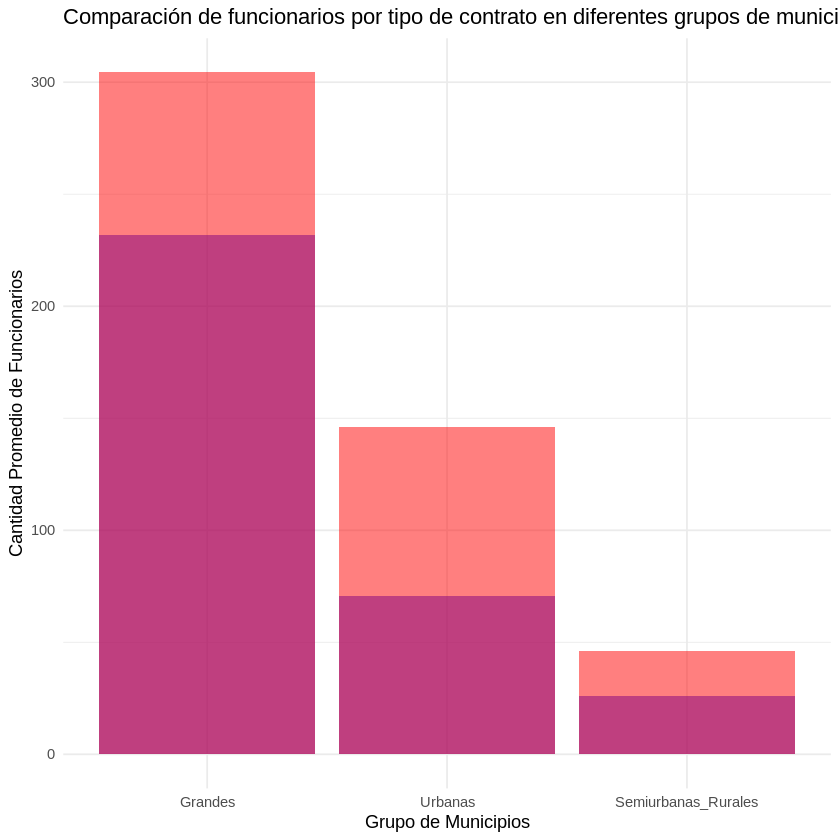

In [19]:
# Instalar ggplot2 si no está instalado
# install.packages("ggplot2")

library(ggplot2)

# Crear el gráfico de barras
ggplot(grupo_funcionarios, aes(x = Grupo_Municipios)) +
  geom_bar(aes(y = Funcionarios_Planta), stat = "identity", fill = "blue", alpha = 0.5) +
  geom_bar(aes(y = Funcionarios_Contrata_Honorarios), stat = "identity", fill = "red", alpha = 0.5) +
  labs(title = "Comparación de funcionarios por tipo de contrato en diferentes grupos de municipios",
       x = "Grupo de Municipios", y = "Cantidad Promedio de Funcionarios") +
  theme_minimal()


Comentarios:  

Se evidencia una clara diferencia en la cantidad de funcionarios entre los tres tipos de municipios, siendo los municipios grandes los que tienen mayor cantidad de personal, seguidos por los urbanos y finalmente los semiurbanos/rurales. Esto sugiere que la infraestructura administrativa en los municipios más grandes está mucho más desarrollada que en los otros tipos de municipios, lo cual es consistente con la concentración de recursos y personal en áreas metropolitanas más grandes.

##PREGUNTA 2

In [27]:
# Clasificación de los municipios como en la pregunta anterior
df$Grupo_Municipios <- cut(df$TIP_SUBDERE,
                           breaks = c(0, 2, 4, 6),
                           labels = c("Grandes", "Urbanas", "Semiurbanas_Rurales"))


In [30]:
library(dplyr)
library(tidyr) # Add this line to load the tidyr package

# Agrupar por grupo de municipios y calcular el promedio por tramo etario
grupo_edades <- df %>%
  group_by(Grupo_Municipios) %>%
  summarise(`18-29` = mean(P7.1, na.rm = TRUE),
            `30-39` = mean(P7.2, na.rm = TRUE),
            `40-49` = mean(P7.3, na.rm = TRUE),
            `50-59` = mean(P7.4, na.rm = TRUE),
            `60+` = mean(P7.5, na.rm = TRUE))

print(grupo_edades)


# A tibble: 3 × 6
  Grupo_Municipios    `18-29` `30-39` `40-49` `50-59` `60+`
  <fct>                 <dbl>   <dbl>   <dbl>   <dbl> <dbl>
1 Grandes                60.2   118.    144.    159.   89.9
2 Urbanas                31.4    56.5    57.0    49.7  24.8
3 Semiurbanas_Rurales    14.6    25.7    22.4    17.3   7  


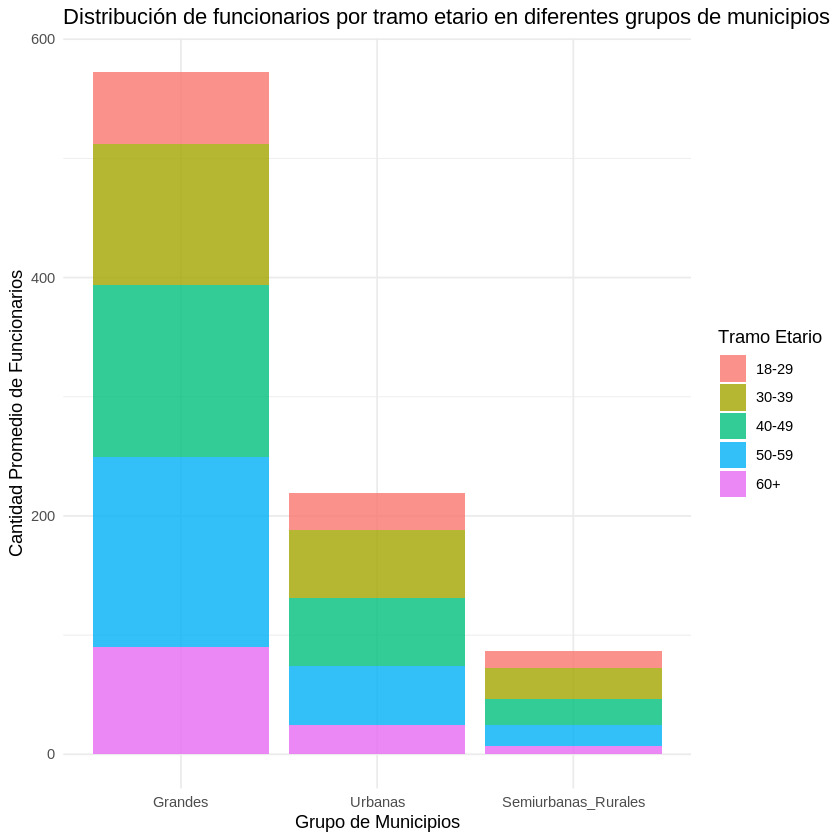

In [31]:
# Convertir los datos a formato largo para facilitar la visualización
grupo_edades_long <- grupo_edades %>%
  pivot_longer(cols = c(`18-29`, `30-39`, `40-49`, `50-59`, `60+`),
               names_to = "Tramo_Etario",
               values_to = "Cantidad")

# Crear gráfico de barras apiladas
ggplot(grupo_edades_long, aes(x = Grupo_Municipios, y = Cantidad, fill = Tramo_Etario)) +
  geom_bar(stat = "identity", position = "stack", alpha = 0.8) +
  labs(title = "Distribución de funcionarios por tramo etario en diferentes grupos de municipios",
       x = "Grupo de Municipios", y = "Cantidad Promedio de Funcionarios",
       fill = "Tramo Etario") +  # Etiqueta de la leyenda
  theme_minimal()


Comentarios:

Los municipios grandes cuentan con una fuerza laboral mucho más extensa y diversa en cuanto a la edad.

En los municipios urbanos y semiurbanos/rurales, hay una menor cantidad de funcionarios en todos los tramos de edad, y una mayor representación de funcionarios de mayor edad (40-59 años).

La baja presencia de funcionarios jóvenes (18-29 años) en municipios semiurbanos/rurales podría ser una señal de que estos municipios tienen dificultades para atraer o retener personal más joven.

## Desarrollo Item 2.b.

##PREGUNTA 3


## Desarrollo Item 3.a

In [ ]:
nuevodata <- sample_n(data, 1000)
nuevodata=as.data.frame(nuevodata)
boxplot(nuevodata$Mileage, main="", col="purple", ylab="Precio autos")

Comentarios: